## Immigration to Canada from 1980 to 2013 

Will use Matplotlib and Seaborn library for Data Visualization

_Add required libraries_

In [16]:
import numpy as np  
import pandas as pd

!conda install -c anaconda xlrd --yes

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.03=py37_0
  - defaults/win-64::anaconda-client==1.7.2=py37_0
  - defaults/win-64::anaconda-navigator==1.9.7=py37_0
  - defaults/win-64::anaconda-project==0.8.2=py37_0
  - defaults/win-64::astroid==2.2.5=py37_0
  - defaults/win-64::astropy==3.1.2=py37he774522_0
  - defaults/win-64::bleach==3.1.0=py37_0
  - defaults/win-64::bokeh==1.0.4=py37_0
  - defaults/win-64::clyent==1.2.2=py37_1
  - defaults/win-64::conda-build==3.17.8=py37_0
  - defaults/win-64::conda-verify==3.1.1=py37_0
  - defaults/win-64::cython==0.29.6=py37ha925a31_0
  - defaults/win-64::dask==1.1.4=py37_1
  - defaults/win-64::flask==1.0.2=py37_1
  - defaults/win-64::ipykernel==5.1.0=py37h39e3cac_0
  - defaults/win-64::ipython==7.4.0=py37h39e3cac_0
  - defaults/win-64::ipywidgets==7.4.2=py37_0
  - defaults/win-64::isort==4.3.16=p



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



RemoveError: 'setuptools' is a dependency of conda and cannot be removed from
conda's operating environment.



In [58]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [59]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Clean the data set to remove a few unnecessary columns.

In [60]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Adding a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [61]:
df_can['Total'] = df_can.sum(axis=1)

In [62]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 39)
Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


# Visualizing Data using Matplotlib

In [63]:
# Import libraries
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Line Pots (Series/Dataframe) 

In [64]:
mpl.style.use(['ggplot'])

In [65]:
years = list(map(str, range(1980, 2014)))

df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)

In [70]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

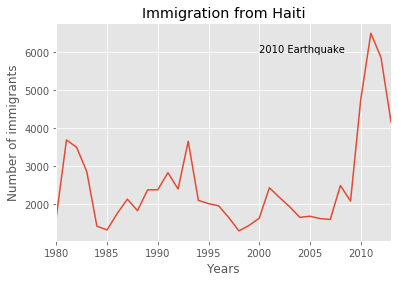

In [75]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake')

plt.show() # need this line to show the updates made to the figure

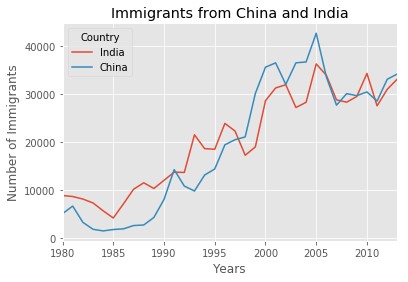

In [77]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI = df_CI.transpose()

df_CI.index = df_CI.index.map(int)
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [84]:
df_top5 = df_can.sort_values(by='Total', ascending=False, axis=0, inplace=False)
df_top5.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


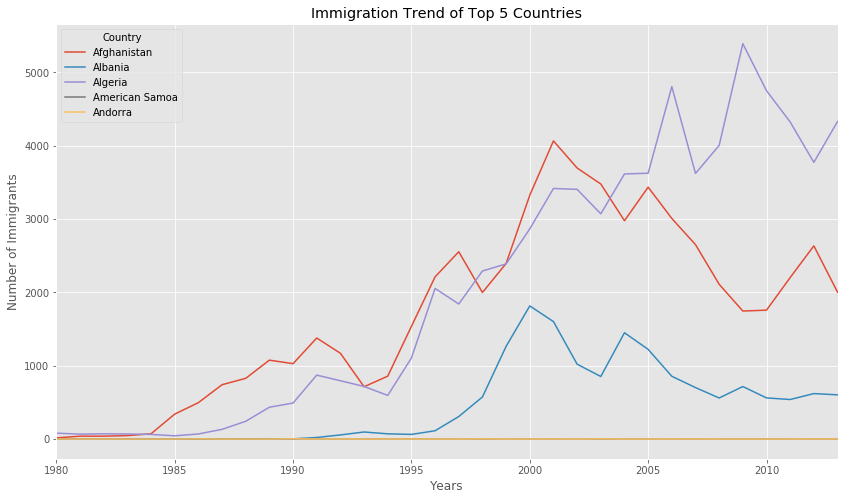

In [87]:
df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose() 
df_top5.index = df_top5.index.map(int)


df_top5.plot(kind='line',figsize=(14, 8))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Area Plots

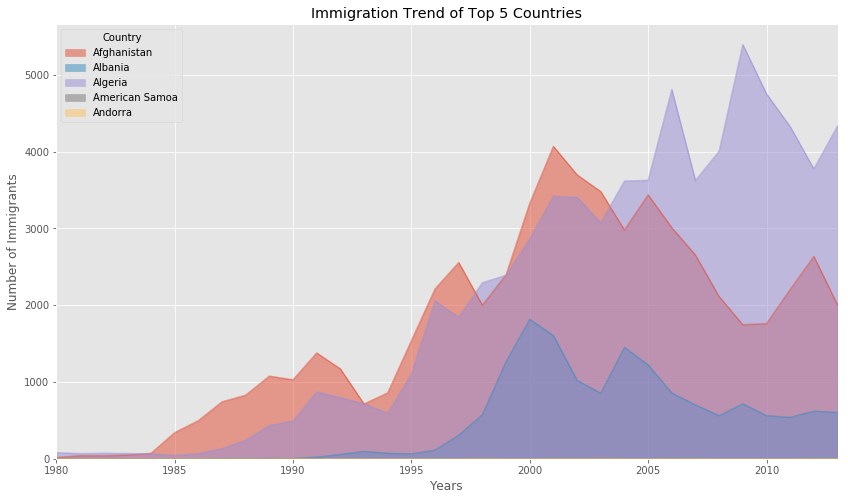

In [92]:
df_top5.plot(kind='area',
             alpha=0.5,
             stacked=False,
             figsize=(14, 8), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Histograms

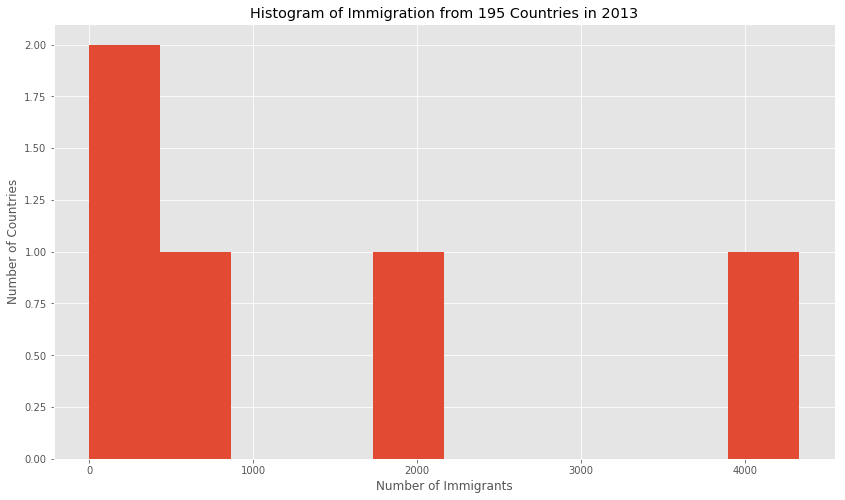

In [101]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].head().plot(kind='hist',figsize=(14, 8),bins=10)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

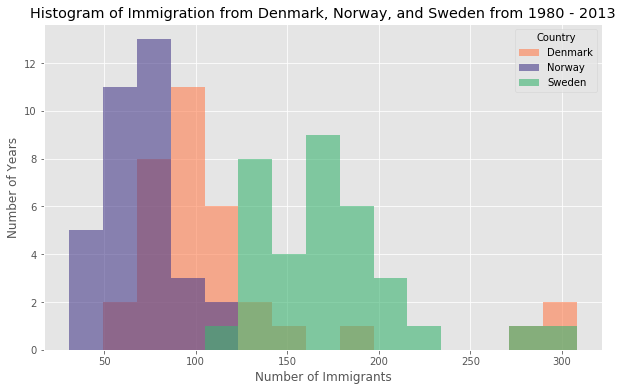

In [104]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()


# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts

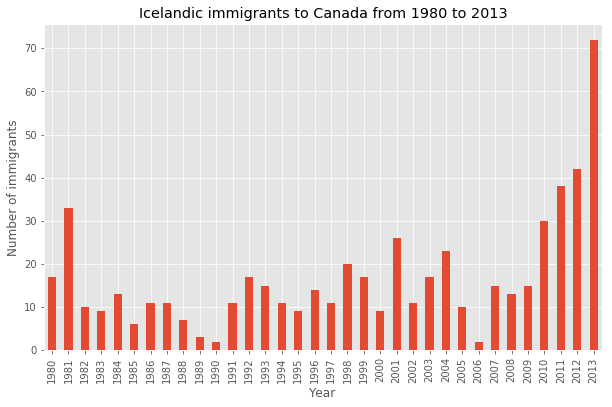

In [106]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') 
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

plt.show()

Country
Romania      93585
Viet Nam     97146
Jamaica     106431
France      109091
Lebanon     115359
Name: Total, dtype: int64

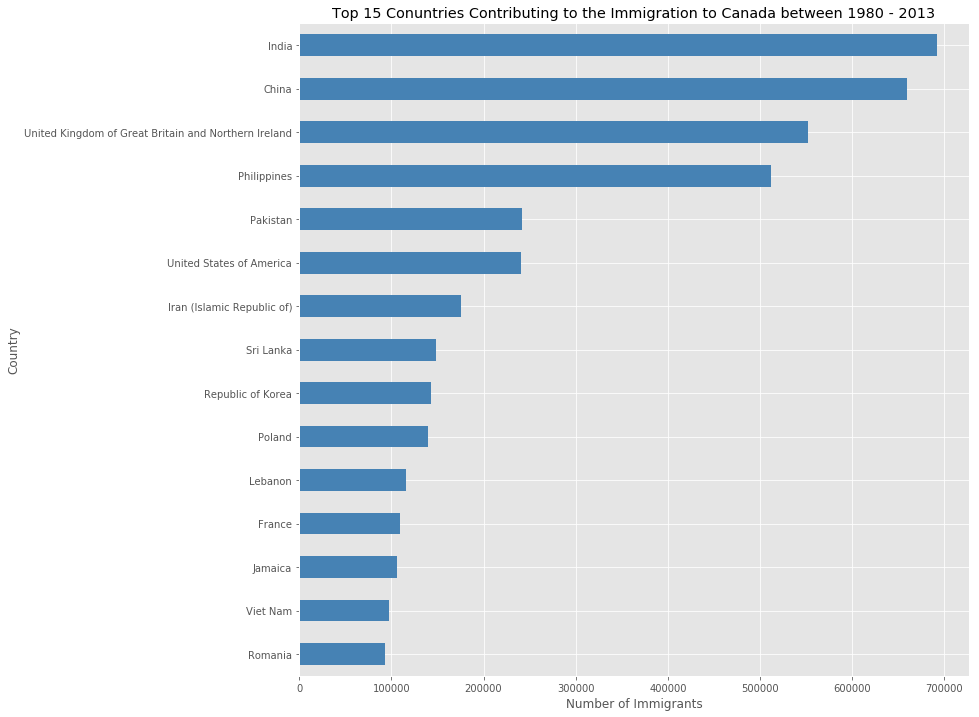

In [111]:
df_top = df_can.sort_values(by='Total', ascending=True, inplace=False)

df_top15 = df_top['Total'].tail(15)

df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') 

df_top15.head()

# Pie Chart

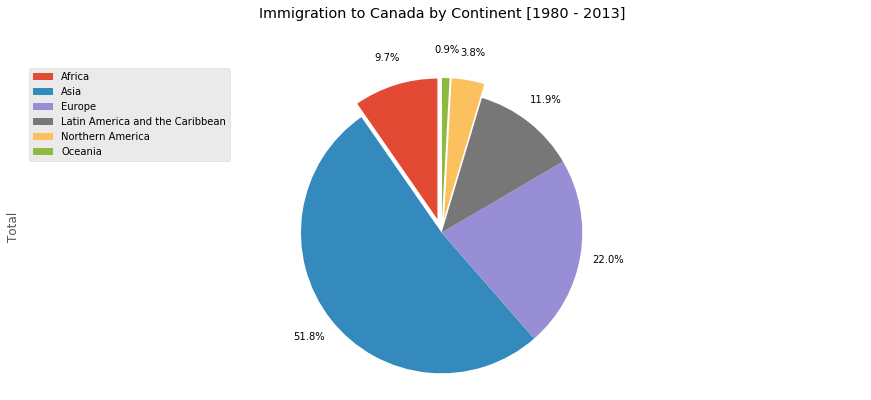

In [124]:
df_continents = df_can.groupby('Continent', axis=0).sum()

explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,          
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.2,    
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()